DataSet Link: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

### **Pittsburgh Arrest**

#### **1. Why This**

* Purpose: Arrest data contains information on people taken into custody by City of Pittsburgh police officers. 

**Safety** is an important elements to decide **the Best Neighborhood**

#### **2. Analyst**

In [2]:
import pandas as pd

In [3]:
arrest=pd.read_csv("Arrest_Dataset.csv",index_col="_id")
arrest.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
6968,1983282,17055137,28.0,M,W,2017-03-27T18:08:00,"Butler ST & 48th ST Pittsburgh, PA 15201",1301 Registration and Certificate of Title Req...,"Butler ST & 48th ST Pittsburgh, PA 15201",Central Lawrenceville,2,901.0,7.0,2.0,-79.957641,40.475854
1804,1976749,16189783,57.0,F,B,2016-10-07T15:34:00,"7000 Block Idlewild ST Pittsburgh, PA 15208",2706 Terroristic Threats. / 2701(a)(3) Simple ...,"7000 Block Idlewild ST Pittsburgh, PA 15208",Homewood North,5,1301.0,9.0,2.0,-79.900698,40.459346
7222,1983604,17034717,NaN,M,B,2017-02-24T22:10:00,"50 Block 11th ST Pittsburgh, PA 15222",5503 Disorderly Conduct. / 5507 Obstructing Hi...,"50 Block 11th ST Pittsburgh, PA 15222",Central Business District,2,201.0,3.0,3.0,-79.987672,40.428960
1005,1975718,16166519,22.0,M,A,2016-09-06T16:44:00,"600 Block 1st AV Pittsburgh, PA 15219",493(1) Furnishing Liquor/Malt to Intox.Persons...,"300 Block Atwood ST Pittsburgh, PA 15213",Central Oakland,4,405.0,3.0,3.0,-79.955945,40.439518
5942,1982026,17031787,15.0,M,B,2017-02-20T17:00:00,"800 Block Mt Pleasant RD Pittsburgh, PA 15214",9015 Failure To Appear/Arrest on Attachment Order,"800 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-79.999473,40.475744


In [36]:
#neighborhood_counts = arrest['INCIDENTNEIGHBORHOOD'].value_counts()

#print("Count of different values in INCIDENTNEIGHBORHOOD:")
#print(neighborhood_counts)
neighborhood_counts = arrest['INCIDENTNEIGHBORHOOD'].value_counts()

# Convert the Series to a DataFrame with two columns
neighborhood_counts = pd.DataFrame({'INCIDENTNEIGHBORHOOD': neighborhood_counts.index, 'Count': neighborhood_counts.values})

# Display the DataFrame
print(neighborhood_counts)


         INCIDENTNEIGHBORHOOD  Count
0   Central Business District   4439
1            South Side Flats   3496
2                     Carrick   2351
3              East Allegheny   2217
4              Homewood South   2090
..                        ...    ...
93              Regent Square     37
94          Central Northside     23
95            Mt. Oliver Boro     18
96     Troy Hill-Herrs Island      6
97    Mt. Oliver Neighborhood      2

[98 rows x 2 columns]


In [37]:
# Filter the dataframe for offenses including "Theft" or "Assault"
filtered_arrest = arrest[arrest['ARRESTTIME'].str.contains('2019|2020|2021|2022|2023', case=False)]

# Group by INCIDENTNEIGHBORHOOD and count the occurrences
neighborhood_counts2019 = filtered_arrest.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='COUNT')

neighborhood_counts2019 = neighborhood_counts2019.sort_values('COUNT', ascending=False)

# Display the table
print(neighborhood_counts2019)


         INCIDENTNEIGHBORHOOD  COUNT
16  Central Business District   2900
75           South Side Flats   1934
15                    Carrick   1398
25             East Allegheny   1266
40             Homewood North   1262
..                        ...    ...
61             Outside County     26
26              East Carnegie     26
55              New Homestead     24
69              Regent Square     19
54            Mt. Oliver Boro      8

[94 rows x 2 columns]


In [40]:
#crime low to zero after 2019
concatenated_df = pd.concat([neighborhood_counts['INCIDENTNEIGHBORHOOD'], neighborhood_counts2019['INCIDENTNEIGHBORHOOD']])


only_in_first = concatenated_df.drop_duplicates(keep=False)


print(only_in_first)

82    Golden Triangle/Civic Arena
94              Central Northside
96         Troy Hill-Herrs Island
97        Mt. Oliver Neighborhood
Name: INCIDENTNEIGHBORHOOD, dtype: object


<Figure size 1080x432 with 0 Axes>

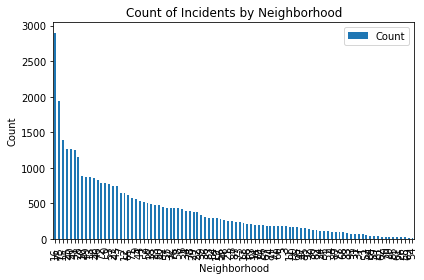

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Count of Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### **3. Word_Analyst**

* We can find from the table that Central Business District, Central Business District, South Side Flats, Carrick, East Allegheny, Homewood North still stay at the top even though we shrink the time scope. They are no doubt the most dangerous district.  
* 4 district crime rate low to 0:
    * Golden Triangle/Civic Arena
    * Central Northside
    * Troy Hill-Herrs Island
    * Mt. Oliver Neighborhood
*They are no doubt the best communities to live 
* However, It doesn't mean several others can't be the best. 
* Compare the smallest 5 crime rate:
* Though Regent Square (19), Mt. Oliver Boro (8) also have unignorable crime rate, records in this table are only from 2016-2023. It decreases much. 